In [502]:
#Importar las librerias a utilizar, pandas, numpy, seaborn y matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## URL Archivos:

https://1drv.ms/u/c/52fb9513047245c4/EfJA9hxn21xIkSwqZm6mT_IBY1Pj4Z97glIBcHOOxts7Cg?e=3wqJQ4

In [546]:
# Leer archivos (no se usan todos, solo train, users y events). descargar el zip y extraer dentro del proyecto
# Asume que tienes los paths a tus archivos
train_path = './event-recommendation-engine-challenge/train.csv'
# test_path = './data/test.csv'
users_path = './event-recommendation-engine-challenge/users.csv'
events_path = './event-recommendation-engine-challenge/events.csv.gz'

dataset = pd.read_csv(train_path)
# test_df = pd.read_csv(test_path)
users_df = pd.read_csv(users_path)
events_df = pd.read_csv(events_path)

In [504]:
#Desplegar el dataset y observar sus características
dataset.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [506]:
users_df.head()

,user_id,locale,birthyear,gender,joinedAt,location,timezone
0,3197468391,id_ID,1993,male,2012-10-02T06:40:55.524Z,Medan Indonesia,480.0
1,3537982273,id_ID,1992,male,2012-09-29T18:03:12.111Z,Medan Indonesia,420.0
2,823183725,en_US,1975,male,2012-10-06T03:14:07.149Z,Stratford Ontario,-240.0
3,1872223848,en_US,1991,female,2012-11-04T08:59:43.783Z,Tehran Iran,210.0
4,3429017717,id_ID,1995,female,2012-09-10T16:06:53.132Z,NaN,420.0


In [507]:
#Desplegar la información del dataset
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38209 entries, 0 to 38208
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    38209 non-null  int64  
 1   locale     38209 non-null  object 
 2   birthyear  36717 non-null  object 
 3   gender     38100 non-null  object 
 4   joinedAt   38151 non-null  object 
 5   location   32744 non-null  object 
 6   timezone   37773 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ MB


In [508]:
users_df.describe()

,user_id,timezone
count,3.820900e+04,37773.000000
mean,2.150982e+09,110.161226
std,1.242134e+09,359.604823
min,6.110000e+03,-720.000000
25%,1.072041e+09,-240.000000
50%,2.153423e+09,240.000000
75%,3.222394e+09,420.000000
max,4.294808e+09,840.000000


In [509]:
events_df.head()

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


In [510]:
#Desplegar la información del dataset
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137972 entries, 0 to 3137971
Columns: 110 entries, event_id to c_other
dtypes: float64(2), int64(103), object(5)
memory usage: 2.6+ GB


In [511]:
dataset = dataset.merge(users_df, left_on='user', right_on="user_id", how="left")
dataset = dataset.merge(events_df, left_on='event', right_on="event_id", how="left")

In [512]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15398 entries, 0 to 15397
Columns: 123 entries, user to c_other
dtypes: float64(3), int64(109), object(11)
memory usage: 14.4+ MB


In [513]:
dataset.head()

,user,event,invited,timestamp,interested,not_interested,user_id_x,locale,birthyear,gender,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,0,0,0,0,2
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,0,0,0,0,24
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0,3044012,id_ID,1990,male,...,0,0,0,1,0,0,0,0,0,37
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,1,0,3,0,56
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,0,0,1,0,79


In [514]:
#check missing values
dataset.isnull().sum()

user          0
event         0
invited       0
timestamp     0
interested    0
             ..
c_97          0
c_98          0
c_99          0
c_100         0
c_other       0
Length: 123, dtype: int64

In [515]:
dataset.head()

,user,event,invited,timestamp,interested,not_interested,user_id_x,locale,birthyear,gender,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,0,0,0,0,2
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,0,0,0,0,24
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0,3044012,id_ID,1990,male,...,0,0,0,1,0,0,0,0,0,37
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,1,0,3,0,56
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0,3044012,id_ID,1990,male,...,0,0,0,0,0,0,0,1,0,79


In [516]:
#Eliminamos country, state y city a pesar de que podrian ser categoricas ya que tienen muchos valores unicos o vacios
dataset = dataset.drop(columns=['timestamp', 'user_id_x', 'locale', 'joinedAt', 'location', 'user_id_y', 'lat', 'lng', 'user', 'event_id', 'zip', 'event', 'country', 'state', 'city'])
# dataset = dataset.drop(columns=['timestamp', 'user_id_x', 'locale', 'joinedAt', 'location', 'user_id_y', 'lat', 'lng', 'user', 'event_id', 'zip', 'event', 'not_interested'])

In [517]:
dataset.head()

,invited,interested,not_interested,birthyear,gender,timezone,start_time,c_1,c_2,c_3,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,0,0,0,1990,male,480.0,2012-10-03T08:00:00.002Z,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,1990,male,480.0,2012-10-03T11:00:00.003Z,2,0,0,...,0,0,0,0,0,0,0,0,0,24
2,0,1,0,1990,male,480.0,2012-10-26T13:30:00.003Z,2,0,0,...,0,0,0,1,0,0,0,0,0,37
3,0,0,0,1990,male,480.0,2012-10-06T05:00:00.003Z,1,2,1,...,0,0,0,0,0,1,0,3,0,56
4,0,0,0,1990,male,480.0,2012-10-06T03:00:00.003Z,2,0,0,...,0,0,0,0,0,0,0,1,0,79


In [518]:
# eliminar los nulos
dataset = dataset.dropna()

In [519]:
dataset.isnull().sum()

invited           0
interested        0
not_interested    0
birthyear         0
gender            0
                 ..
c_97              0
c_98              0
c_99              0
c_100             0
c_other           0
Length: 108, dtype: int64

In [520]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15172 entries, 0 to 15397
Columns: 108 entries, invited to c_other
dtypes: float64(1), int64(104), object(3)
memory usage: 12.6+ MB


In [521]:
# convertir a categorico:  gender, timezone (ahorita es por ejemplo 480.0), start_time (2012-10-03T08:00:00.002Z, dividir en anio, mes, dia y hora)
dataset['gender'] = dataset['gender'].replace({'male':1,'female':0})
dataset['start_date'] = pd.to_datetime(dataset['start_time']).dt.day_name()
dataset['start_time'] = pd.to_datetime(dataset['start_time']).dt.hour
# convertir start_date a un numero del 0 al 6
dataset['start_date'] = dataset['start_date'].replace({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})
dataset['birthyear'] = dataset['birthyear'].astype('int')


C:\Users\jpdealba\AppData\Local\Temp\ipykernel_12388\241334746.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['gender'] = dataset['gender'].replace({'male':1,'female':0})
C:\Users\jpdealba\AppData\Local\Temp\ipykernel_12388\241334746.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['start_date'] = dataset['start_date'].replace({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})


array([2, 4, 5, 6, 1, 3, 0], dtype=int64)

In [522]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15172 entries, 0 to 15397
Columns: 109 entries, invited to start_date
dtypes: float64(1), int32(2), int64(106)
memory usage: 12.6 MB


In [523]:
dataset.describe()

,invited,interested,not_interested,birthyear,gender,timezone,start_time,c_1,c_2,c_3,...,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other,start_date
count,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,...,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000
mean,0.041919,0.268125,0.033812,1988.669852,0.646915,126.718956,6.910032,2.352294,1.198590,1.132283,...,0.071447,0.080807,0.110730,0.067097,0.434682,0.051938,0.088782,0.063736,61.208278,3.847746
std,0.200411,0.442998,0.180752,9.985466,0.477944,373.709920,6.903261,30.953481,2.785366,2.510167,...,0.346223,0.357314,0.364893,0.474496,25.325885,0.288083,0.495408,0.315212,156.562448,1.759712
min,0.000000,0.000000,0.000000,1905.000000,0.000000,-720.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1987.000000,0.000000,-300.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.000000
50%,0.000000,0.000000,0.000000,1992.000000,1.000000,420.000000,4.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,4.000000
75%,0.000000,1.000000,0.000000,1994.000000,1.000000,420.000000,13.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,5.000000
max,1.000000,1.000000,1.000000,1999.000000,1.000000,810.000000,23.000000,2186.000000,82.000000,85.000000,...,9.000000,10.000000,9.000000,23.000000,1801.000000,9.000000,16.000000,7.000000,9664.000000,6.000000


In [524]:
dataset.head()

,invited,interested,not_interested,birthyear,gender,timezone,start_time,c_1,c_2,c_3,...,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other,start_date
0,0,0,0,1990,1,480.0,8,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,0,0,0,1990,1,480.0,11,2,0,0,...,0,0,0,0,0,0,0,0,24,2
2,0,1,0,1990,1,480.0,13,2,0,0,...,0,0,1,0,0,0,0,0,37,4
3,0,0,0,1990,1,480.0,5,1,2,1,...,0,0,0,0,1,0,3,0,56,5
4,0,0,0,1990,1,480.0,3,2,0,0,...,0,0,0,0,0,0,1,0,79,5


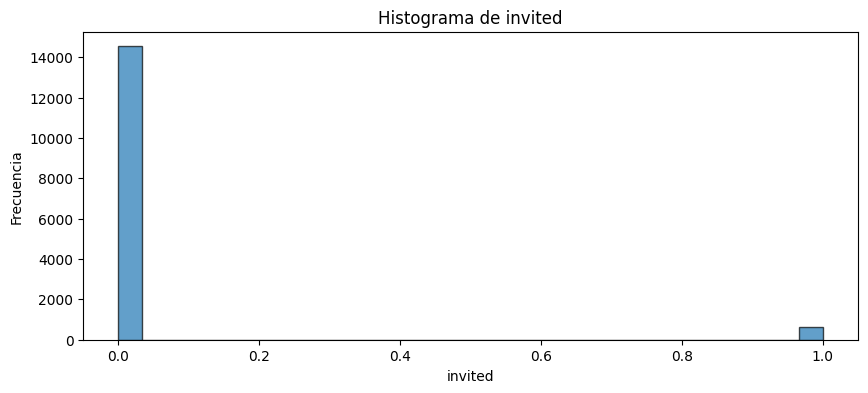

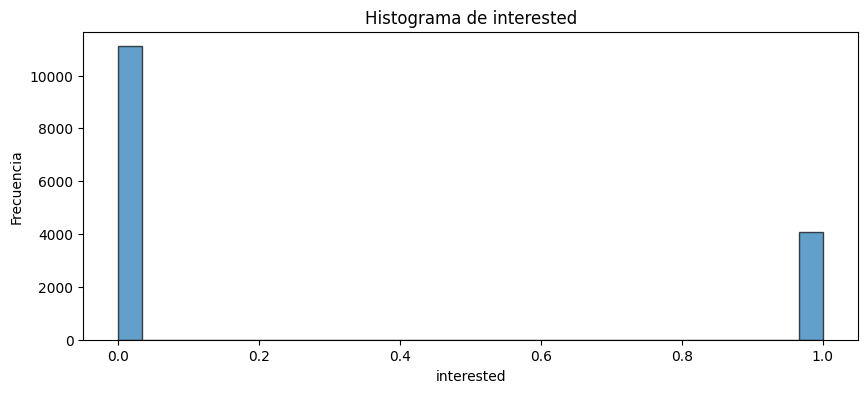

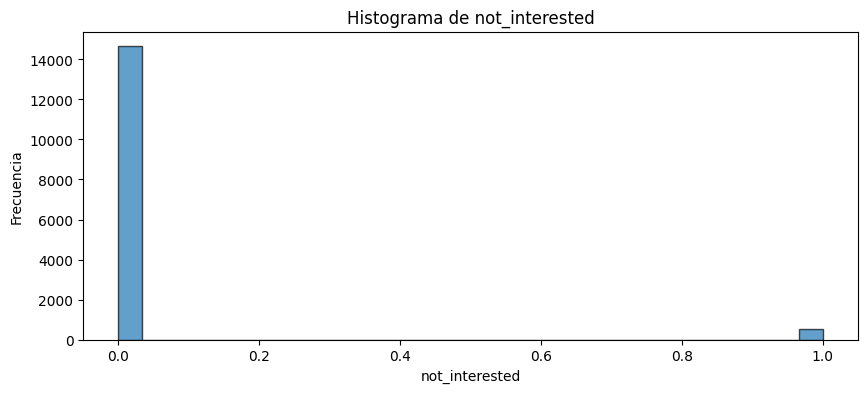

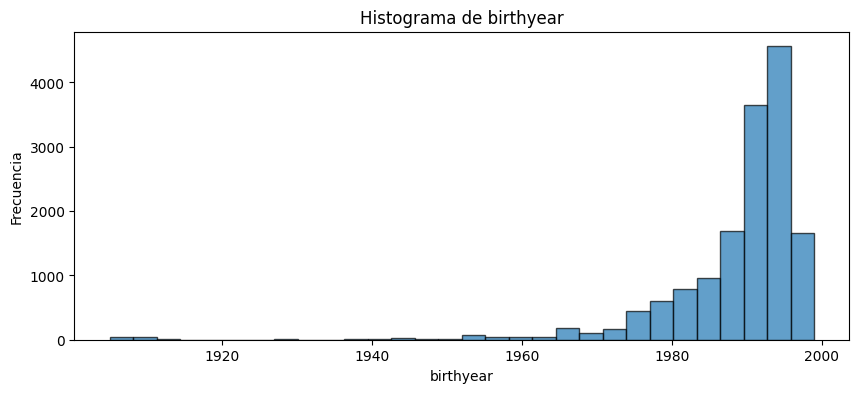

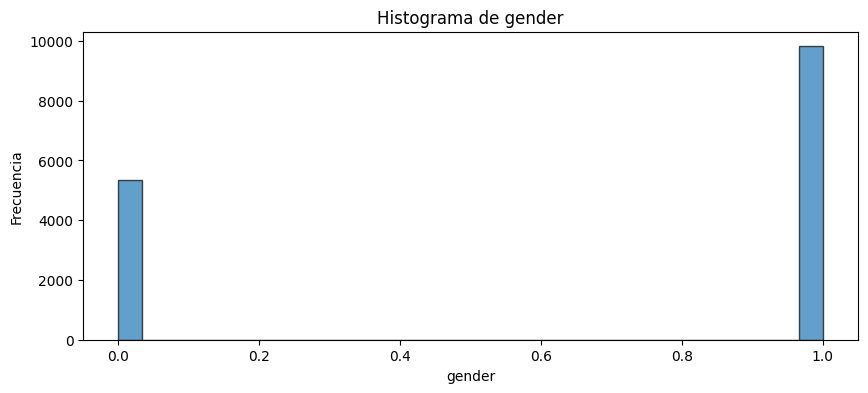

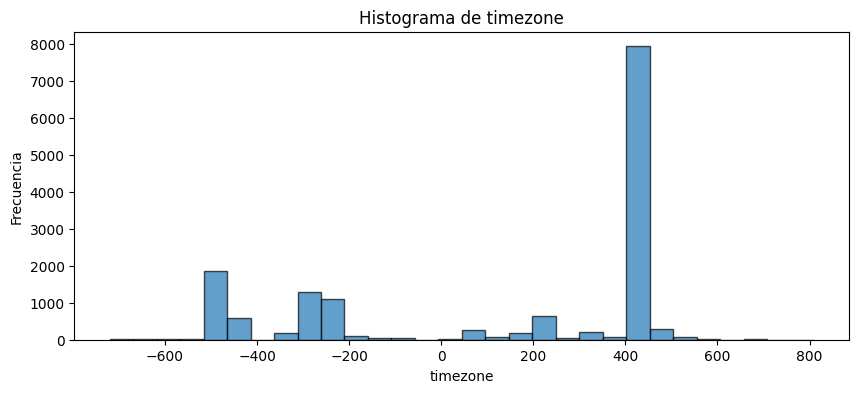

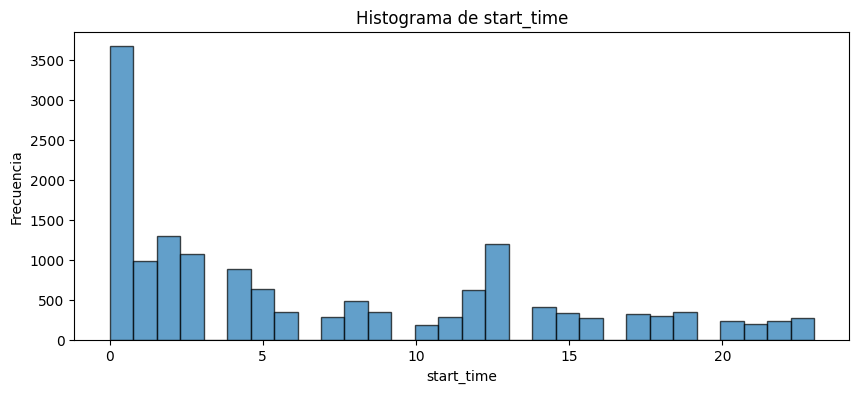

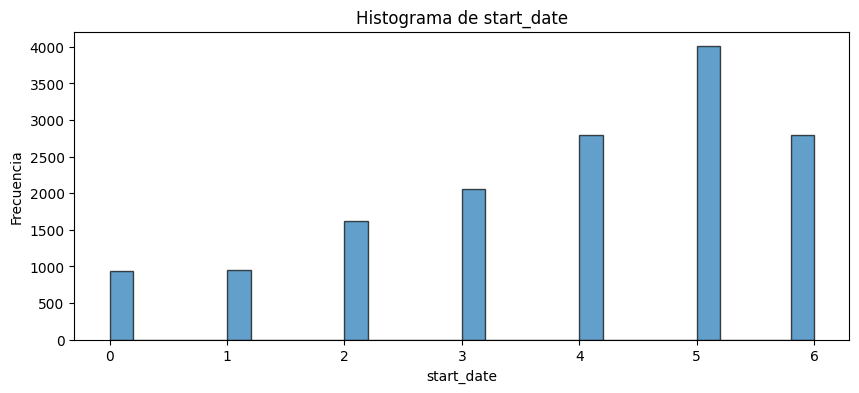

In [525]:
#Revisar los histogramas de cada columna
#En cada gráfica visualizar aquéllas columnas donde se repita el mismo valor en todos los datos
for column in dataset.select_dtypes(include=['int', 'float']):
    # Comprobar si todos los valores en la columna son iguales
    if dataset[column].nunique() == 1:
        print(f"Columna '{column}' tiene un valor constante: {dataset[column].iloc[0]}")
    else:
        # si empieza con c_ no mostrar
        if not column.startswith('c_'):
            plt.figure(figsize=(10, 4))
            plt.hist(dataset[column], bins=30, edgecolor='k', alpha=0.7)
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.show()

In [526]:
# ver usuario masculinos y femeninos
df_male = dataset[dataset['gender'] == 1]
df_fem = dataset[dataset['gender'] == 0]

In [527]:
#Y observaremos nuestro dataset

print('Total = ', len(dataset))
print('Número de empleados que masculinos = ', len(df_male))
print('Porcentaje de empleados masculinos = ', len(df_male)/len(dataset)*100, '%')

print('Número de empleados femeninos = ', len(df_fem))
print('Número de empleados femeninos = ', len(df_fem)/len(dataset)*100, '%')

Total =  15172
Número de empleados que masculinos =  9815
Porcentaje de empleados masculinos =  64.69153704191932 %
Número de empleados femeninos =  5357
Número de empleados femeninos =  35.308462958080675 %


In [528]:
# hacer describe sin las columnas que empiezan con c_
dataset.drop(columns=dataset.filter(regex='c_')).describe()

,invited,interested,not_interested,birthyear,gender,timezone,start_time,start_date
count,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000
mean,0.041919,0.268125,0.033812,1988.669852,0.646915,126.718956,6.910032,3.847746
std,0.200411,0.442998,0.180752,9.985466,0.477944,373.709920,6.903261,1.759712
min,0.000000,0.000000,0.000000,1905.000000,0.000000,-720.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1987.000000,0.000000,-300.000000,1.000000,3.000000
50%,0.000000,0.000000,0.000000,1992.000000,1.000000,420.000000,4.000000,4.000000
75%,0.000000,1.000000,0.000000,1994.000000,1.000000,420.000000,13.000000,5.000000
max,1.000000,1.000000,1.000000,1999.000000,1.000000,810.000000,23.000000,6.000000


In [529]:
dataset.head()

,invited,interested,not_interested,birthyear,gender,timezone,start_time,c_1,c_2,c_3,...,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other,start_date
0,0,0,0,1990,1,480.0,8,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,0,0,0,1990,1,480.0,11,2,0,0,...,0,0,0,0,0,0,0,0,24,2
2,0,1,0,1990,1,480.0,13,2,0,0,...,0,0,1,0,0,0,0,0,37,4
3,0,0,0,1990,1,480.0,5,1,2,1,...,0,0,0,0,1,0,3,0,56,5
4,0,0,0,1990,1,480.0,3,2,0,0,...,0,0,0,0,0,0,1,0,79,5


In [530]:
train_numericos = dataset.select_dtypes(include=[np.number])
correlation_matrix = train_numericos.corr()
print(correlation_matrix)

                 invited  interested  not_interested  birthyear    gender  \
invited         1.000000   -0.036029       -0.019114  -0.122068 -0.019570   
interested     -0.036029    1.000000       -0.113229   0.041917  0.019410   
not_interested -0.019114   -0.113229        1.000000  -0.130583 -0.007529   
birthyear      -0.122068    0.041917       -0.130583   1.000000 -0.010933   
gender         -0.019570    0.019410       -0.007529  -0.010933  1.000000   
...                  ...         ...             ...        ...       ...   
c_98            0.035355    0.009667        0.044756  -0.078591 -0.009464   
c_99           -0.010267   -0.003954        0.016529  -0.003175  0.011861   
c_100           0.005701    0.019223        0.021176  -0.025879  0.017253   
c_other        -0.002826    0.007207        0.012108  -0.013376 -0.006715   
start_date      0.001090    0.037997       -0.045777   0.030105  0.020485   

                timezone  start_time       c_1       c_2       c_3  ...  \


In [531]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15172 entries, 0 to 15397
Columns: 109 entries, invited to start_date
dtypes: float64(1), int32(2), int64(106)
memory usage: 12.6 MB


## Si hay algun tipo de dato categorico lo convertimos y concatenamos

In [532]:
#Obtener los features que son categóricos
x_cat = dataset.select_dtypes(include=['object'])

In [533]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15172 entries, 0 to 15397
Empty DataFrame


In [534]:
#Convertir mis variables categóricas a una matriz OneHot
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [535]:
x_cat

array([], shape=(15172, 0), dtype=float64)

In [536]:
x_cat.shape

(15172, 0)

In [537]:
#Borrar de mi base de datos principal, las variables categóricas, y que me queden solo los datos numéricos
x_numerical = dataset.select_dtypes(include=['int64', 'float64'])

In [538]:
x_numerical.shape

(15172, 107)

In [539]:
#Convertir a dataframe mi matriz x_cat
x_cat_df = pd.DataFrame(x_cat, index=dataset.index)

In [540]:
x_numerical

,invited,interested,not_interested,gender,timezone,c_1,c_2,c_3,c_4,c_5,...,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other,start_date
0,0,0,0,1,480.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,0,0,0,1,480.0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,24,2
2,0,1,0,1,480.0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,37,4
3,0,0,0,1,480.0,1,2,1,1,0,...,0,0,0,0,1,0,3,0,56,5
4,0,0,0,1,480.0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,79,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15393,0,0,0,0,420.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,80,5
15394,0,0,0,0,420.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80,6
15395,0,0,0,0,420.0,3,2,0,1,1,...,0,0,0,0,0,0,0,0,60,6
15396,0,0,0,0,420.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,2


In [541]:
#Vamos a juntar mi DF numerico con el DF categorico
x_final = pd.concat([x_numerical, x_cat_df], axis=1)

In [542]:
x_final

,invited,interested,not_interested,gender,timezone,c_1,c_2,c_3,c_4,c_5,...,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other,start_date
0,0,0,0,1,480.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
1,0,0,0,1,480.0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,24,2
2,0,1,0,1,480.0,2,0,0,0,0,...,0,0,1,0,0,0,0,0,37,4
3,0,0,0,1,480.0,1,2,1,1,0,...,0,0,0,0,1,0,3,0,56,5
4,0,0,0,1,480.0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,79,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15393,0,0,0,0,420.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,80,5
15394,0,0,0,0,420.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80,6
15395,0,0,0,0,420.0,3,2,0,1,1,...,0,0,0,0,0,0,0,0,60,6
15396,0,0,0,0,420.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,2


## Split dataset into training and testing data

In [543]:
#Convert dataset in X numpy matrix, and obtain de Y array (output).
def df_to_np(data):
    # todas las columnas excepto 'interested' son características
    feature_columns = [col for col in data.columns if col != 'interested']
    x = np.array(data[feature_columns])
    y = np.array(data['interested'])
    return x, y, data
#Testing

x, y, df_events = df_to_np(dataset)

print('X size: ', np.shape(x), 'Y size: ', np.shape(y))

X size:  (15172, 108) Y size:  (15172,)


In [544]:
from sklearn.model_selection import train_test_split
# 2. Split datasets
def splitDataset(x, y, test_size):

    xTrain, xTest, yTrain, yTest = train_test_split(
        x, y, test_size=test_size, random_state=0)

    return xTrain, xTest, yTrain, yTest


# Testing
test_size = 0.33
xTrain, xTest, yTrain, yTest = splitDataset(x, y, test_size)


print('Split X', len(x), 'into train with',
      len(xTrain), 'and test with', len(xTest))



Split X 15172 into train with 10165 and test with 5007
